In [173]:
from __future__ import print_function, division

%matplotlib inline
from scipy import stats
import numpy as np
import pandas

import nsfg
import first
import analytic

import thinkstats2
import thinkplot

In [174]:
resp=pandas.DataFrame(nsfg.ReadFemResp())

In [305]:
school_dic={}
uni_dic={}
for i in range(len(resp.hieduc)):      #searching for the education level of the respondents in hieduc column
    if resp.hieduc[i]<=10:          #taking respondents with no degree which are less then 10 
        school_dic[i]=resp.hieduc[i]    #i put the mothers with no degree into school_dic with their row numbers to use it later
    else:
        uni_dic[i]=resp.hieduc[i]   #mothers with at least college degree are in uni_dic dictionary

In [193]:
school_array=[]         #i made a list for school dataframe for mothers with no degree
for key in school_dic:
    school_array.append([key, school_dic[key],resp.agemomb1[key]])    #columns of dataframe are row number of respondent,
                                                                    #respondents with no degree and their age
    

In [194]:
col=["Respondent","School", "Age"]   #column names of school dataframe
school=pandas.DataFrame(school_array, columns=col)  # i put my array into my dataframe under the corresponding column names
school

,Respondent,School,Age
0,0,6,2
1,1,10,4
2,2,9,4
3,3,5,3
4,4,6,3
5,5,5,4
6,6,6,4
7,7,9,3
8,8,9,3
9,9,10,3


In [196]:
uni_array=[]          #i made same things for the university dataframe
for key in uni_dic:
    uni_array.append([key, uni_dic[key],resp.agemomb1[key]])


In [197]:
col=["Respondent","Degree","Age"]
university=pandas.DataFrame(uni_array, columns=col)
university

,Respondent,Degree,Age
0,22,12,3
1,32,12,2
2,34,11,3
3,35,12,5
4,43,12,2
5,48,12,3
6,53,12,2
7,54,12,2
8,88,12,3
9,91,12,2


In [132]:
school_agemomb1=[]           #i made this list just for mothers. I thought when we calculate the ages at first birth, 
                                #there shouldn't be another women exept mothers
for i in school.Respondent:
    if resp.agemomb1[i] == 96:  #i skip the mother-figure had no children
        pass
    else:
        school_agemomb1.append(resp.agemomb1[i])


In [133]:
university_agemomb1=[]         #same things for the university dataframe
for i in university.Respondent:
    if resp.agemomb1[i]==96:
        pass
    else:
        university_agemomb1.append(resp.agemomb1[i])


In [153]:
np.min(school_agemomb1), np.min(university_agemomb1)   #there are mothers less than 18 years old in both dataframes

(1, 1)

In [154]:
max(university_agemomb1), max(school_agemomb1)        #there are both mothers at age 30 or older in both dataframes

(5, 5)

In [145]:
np.mean(school_agemomb1), np.mean(university_agemomb1) #average age of the mothers with no degree is less than mothers with degree

(2.604128271286399, 3.0354777672658466)

In [149]:
np.var(school_agemomb1), np.var(university_agemomb1) #variance of the mother with no degree is bigger than the mothers with degree

(1.2715937203691825, 1.023812283564362)

In [147]:
np.std(school_agemomb1), np.std(university_agemomb1)  #mothers with no degree have bigger std which means their ages differ
                                                        #more than the ages of mother with degree

(1.1276496443351465, 1.0118360952073029)

In [155]:
np.median(school_agemomb1), np.median(university_agemomb1) #they have the same middle age

(3.0, 3.0)

In [162]:
stats.mode(school_agemomb1), stats.mode(university_agemomb1)   #most repeated age is the same for both dataframes

(ModeResult(mode=array([3], dtype=int64), count=array([2044])),
 ModeResult(mode=array([3], dtype=int64), count=array([973])))

In [306]:
school_pmf = thinkstats2.Pmf(school_agemomb1, label='School')   #pmf of mothers with no degree
university_pmf = thinkstats2.Pmf(university_agemomb1, label='University')   #pmf of mothers with degree
school_pmf, university_pmf

(Pmf({1: 0.2123110947290822, 2: 0.21913011426465168, 3: 0.3767047548838924, 4: 0.1358274972355326, 5: 0.056026538886841136}),
 Pmf({1: 0.08514664143803216, 2: 0.16272469252601704, 3: 0.4602649006622517, 4: 0.2152317880794702, 5: 0.07663197729422895}))

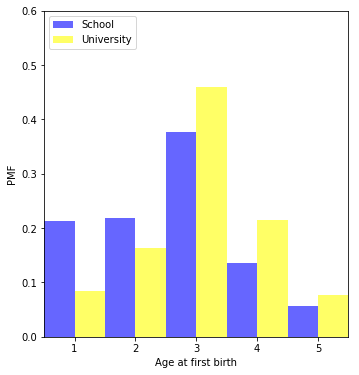

In [307]:
width=0.5               #plot of pmfs of both mothers with no degree and mothers with degree
axis = [0.5,5.5, 0, 0.6]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(school_pmf, align='right', width=width, color="blue")
thinkplot.Hist(university_pmf, align='left', width=width, color= "yellow")
thinkplot.Config(xlabel="Age at first birth", ylabel='PMF', axis=axis)


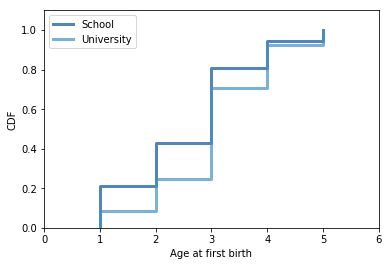

In [308]:
school_cdf = thinkstats2.Cdf(school_agemomb1, label='School')     #cdf of mothers with no degree
university_cdf = thinkstats2.Cdf(university_agemomb1, label='University')   #cdf of mothers with degree
axis = [0,6, 0,1.1]
thinkplot.PrePlot(2)     #plot of cdfs of both mothers with no degree and mothers with degree
thinkplot.Cdfs([school_cdf, university_cdf])
thinkplot.Config(xlabel='Age at first birth', ylabel='CDF', loc="upper left", axis=axis)

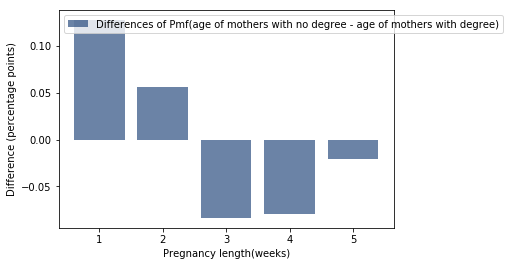

In [309]:
weeks = range(1, 6)
diffs = []
for week in weeks:    #difference between ages of mothers with no degree and mothers with no degree
    p1 = school_pmf.Prob(week)
    p2 = university_pmf.Prob(week)
    diff = (p1 - p2)
    diffs.append(diff)

thinkplot.Bar(weeks, diffs, label="Differences of Pmf(age of mothers with no degree - age of mothers with degree)")
thinkplot.Config(xlabel='Pregnancy length(weeks)', ylabel='Difference (percentage points)')

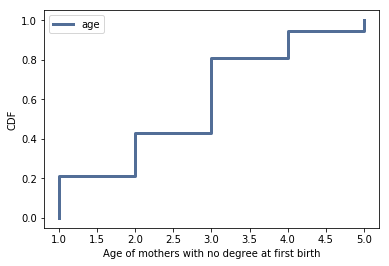

In [310]:
cdf_school = thinkstats2.Cdf(school_agemomb1, label='age')   #cdf of mothers with no degree
thinkplot.Cdf(cdf_school)
thinkplot.Config(xlabel='Age of mothers with no degree at first birth', ylabel='CDF', loc='upper left')

In [278]:
cdf_school[1]    #probability of mothers at age less than 18 among mothers with no degree

0.2123110947290822

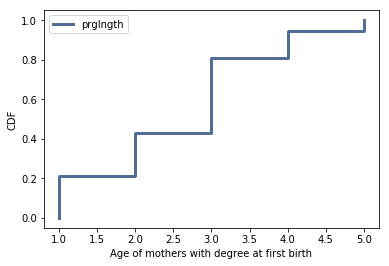

In [282]:
cdf_university = thinkstats2.Cdf(university_agemomb1, label='age')    #cdf of mothers with degree
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Age of mothers with degree at first birth', ylabel='CDF', loc='upper left')

In [284]:
cdf_university[1] #probability of mothers at age more than 18 among mothers with no degree

0.08514664143803216

In [285]:
def PercentileRank(ages, age_of_mother):    #calculation of PercentileRank
    count = 0
    for age in ages:
        if age <= age_of_mother:
            count += 1

    percentile_rank = 100.0 * count / len(ages)
    return percentile_rank

In [295]:
def Percentile(ages, percentile_rank):  
    ages.sort()
    for age in ages:
        if PercentileRank(ages, age) >= percentile_rank:
            return age

In [296]:
PercentileRank(school_agemomb1, 1)

21.23110947290822